In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

***Reading the dataset and explore the features***

In [2]:
df = pd.read_csv('space_rocket_dataset.csv')

In [3]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    94 non-null     int64  
 1   Date            94 non-null     object 
 2   BoosterVersion  94 non-null     object 
 3   PayloadMass     88 non-null     float64
 4   Orbit           94 non-null     object 
 5   LaunchSite      94 non-null     object 
 6   Outcome         94 non-null     object 
 7   Flights         94 non-null     int64  
 8   GridFins        94 non-null     bool   
 9   Reused          94 non-null     bool   
 10  Legs            94 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     94 non-null     int64  
 14  Serial          94 non-null     object 
 15  Longitude       94 non-null     float64
 16  Latitude        94 non-null     float64
dtypes: bool(3), float64(4), int64(3), obj

### This dataset contians both records of Falcon 1 and Falcon 9. The outcome of Falcon1 are all faile, thus, it might affect the accuracy rate to predict the launch outcome of Falcon 9, those records would be dropped. And also the Outcome attribute actually contains two features. The first one describes if the mission is success, it has three distince values, None, True and False. The second one describes which type of launch pad is involved in this mission, it has three distinct vlaues, None, True and Flase.

In [5]:
df[['Success', 'pad_type']] = df['Outcome'].str.split(' ', 1, expand=True)
df = df.drop(columns=['Outcome'])
df.drop(df[df['BoosterVersion'] == 'Falcon 1'].index, inplace = True)
di = {'None':0, 'False':0, 'True':1}
df.replace({"Success": di}, inplace=True)

In [6]:
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
Success            0
pad_type           0
dtype: int64

There are two columns contains missing values, which are PayloadMass and LandingPad.\n
Firstly, let's fill the NaN of Landing pad by using the location, the strategy is that landing pad will be same is they are in the same location

In [7]:
fill_lp_1 = list(df.groupby(['Longitude', 'Latitude']))
frames = []
for grp in fill_lp_1:
    temp_df = grp[1]
    temp_df['LandingPad'].fillna(method='ffill', inplace=True)
    temp_df['LandingPad'].fillna(method='bfill', inplace=True)
    temp_df1 = temp_df
    frames.append(temp_df1)
lp_fill_1 = pd.concat(frames)
lp_fill_1 = lp_fill_1.sort_index(ascending=True)

In [8]:
lp_fill_1.isnull().sum()

FlightNumber      0
Date              0
BoosterVersion    0
PayloadMass       5
Orbit             0
LaunchSite        0
Flights           0
GridFins          0
Reused            0
Legs              0
LandingPad        0
Block             0
ReusedCount       0
Serial            0
Longitude         0
Latitude          0
Success           0
pad_type          0
dtype: int64

In [9]:
print(lp_fill_1[lp_fill_1['LandingPad'].isnull()])

Empty DataFrame
Columns: [FlightNumber, Date, BoosterVersion, PayloadMass, Orbit, LaunchSite, Flights, GridFins, Reused, Legs, LandingPad, Block, ReusedCount, Serial, Longitude, Latitude, Success, pad_type]
Index: []


<AxesSubplot:xlabel='LandingPad'>

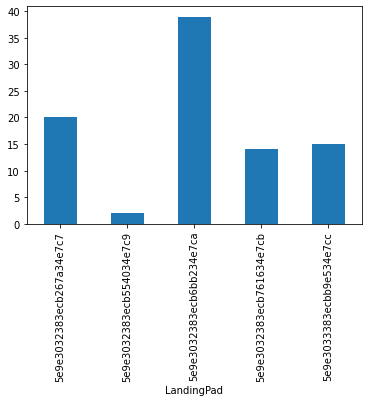

In [10]:
lp_fill_1.groupby('LandingPad')['FlightNumber'].nunique().plot.bar()

In [11]:
df = lp_fill_1.copy()

In [12]:
group1 = list(df.groupby(['Orbit','Success']))

In [13]:
frames1 = []
for grp in group1:
    temp_df = grp[1]
    temp_df['PayloadMass'].fillna(value=temp_df['PayloadMass'].mean(), inplace=True)
    temp_df1 = temp_df
    frames1.append(temp_df1)
new_df1 = pd.concat(frames1)
new_df1 = new_df1.sort_index(ascending=True)

In [14]:
new_df1.isnull().sum()

FlightNumber      0
Date              0
BoosterVersion    0
PayloadMass       2
Orbit             0
LaunchSite        0
Flights           0
GridFins          0
Reused            0
Legs              0
LandingPad        0
Block             0
ReusedCount       0
Serial            0
Longitude         0
Latitude          0
Success           0
pad_type          0
dtype: int64

In [15]:
group2 = list(new_df1.groupby(['Orbit']))
frames2 = []
for grp in group2:
    temp_df = grp[1]
    temp_df['PayloadMass'].fillna(value=temp_df['PayloadMass'].mean(), inplace=True)
    temp_df1 = temp_df
    frames2.append(temp_df1)
new_df2 = pd.concat(frames2)
new_df2 = new_df2.sort_index(ascending=True)

In [16]:
new_df2.isnull().sum()

FlightNumber      0
Date              0
BoosterVersion    0
PayloadMass       2
Orbit             0
LaunchSite        0
Flights           0
GridFins          0
Reused            0
Legs              0
LandingPad        0
Block             0
ReusedCount       0
Serial            0
Longitude         0
Latitude          0
Success           0
pad_type          0
dtype: int64

In [17]:
print(new_df2[new_df2['PayloadMass'].isnull()])

    FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
76            88  2020-01-19       Falcon 9          NaN    SO    KSC LC 39A   
86            98  2020-07-20       Falcon 9          NaN   GEO  CCSFS SLC 40   

    Flights  GridFins  Reused   Legs                LandingPad  Block  \
76        4     False    True  False  5e9e3032383ecb6bb234e7ca    5.0   
86        2      True    True   True  5e9e3033383ecbb9e534e7cc    5.0   

    ReusedCount Serial  Longitude   Latitude  Success pad_type  
76            3  B1046 -80.603956  28.608058        0     None  
86           12  B1058 -80.577366  28.561857        1     ASDS  


orbit type, SO = SSO, and GEO has similar distance with MEO, thus, let's replace those two with new values. 

In [18]:
new_df2['Orbit'].replace('SO', 'SSO', inplace=True)
new_df2['Orbit'].replace('GEO', 'MEO', inplace=True)

In [19]:
group3 = list(new_df2.groupby(['Orbit']))
frames3 = []
for grp in group3:
    temp_df = grp[1]
    temp_df['PayloadMass'].fillna(value=temp_df['PayloadMass'].mean(), inplace=True)
    temp_df1 = temp_df
    frames3.append(temp_df1)
new_df3 = pd.concat(frames3)
new_df3 = new_df3.sort_index(ascending=True)

In [20]:
new_df3.isnull().sum()

FlightNumber      0
Date              0
BoosterVersion    0
PayloadMass       0
Orbit             0
LaunchSite        0
Flights           0
GridFins          0
Reused            0
Legs              0
LandingPad        0
Block             0
ReusedCount       0
Serial            0
Longitude         0
Latitude          0
Success           0
pad_type          0
dtype: int64

In [22]:
new_df3.to_csv('data_after_wrangle.csv', index=False)